In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import gamma, poisson

**Exercise:** Returning to the first version of the World Cup Problem.  Suppose France and Croatia play a rematch.  What is the probability that France scores first?

Hint: Compute the posterior predictive distribution for the time until the first goal by making a mixture of exponential distributions.  You can use the following function to make a PMF that approximates an exponential distribution.

## Reasoning
* Let $\boldsymbol{X} = \text{time between goals}$
* $\boldsymbol{X}\sim\mathrm{Exponential}(\theta)$
* $\theta\sim L(G|P)$
* $G\sim\mathrm{Gamma(1.4)}$
* $P\sim\mathrm{Poisson(4)}$ for france, and $P\sim\mathrm{Poisson(2)}$ for Croatia

As $\theta$ is also a distribution we need a set of Exponential distributions for each of the values of $\theta$ to get the weighted exponential-like distribution.

$\boldsymbol{X}_f\sim\sum_{i=0}^n\mathrm{Exponential}(x_i)\cdot\theta_i$ 

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

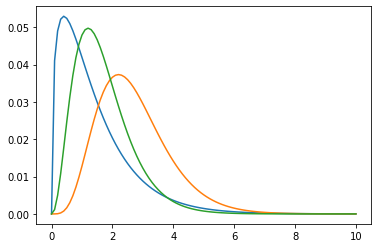

In [2]:
# Let's calculate the prior for both teams
no_of_matches = 10
# These lambda values represent goal rates (in matches)
lbd_values = np.linspace(0, no_of_matches, 101)
g = gamma(1.4).pdf(lbd_values)
g /= g.sum()

# Now, get likelihoods after observing that france scored 4 and Croatia scored 2
pf, pc = [poisson(lbd_values).pmf(n) for n in (4, 2)]

# calculate posteriors
lf = g.copy()
lf *= pf
lf /= lf.sum()

lc = g.copy()
lc *= pc
lc /= lc.sum()

# Let's see how they look
[sns.lineplot(x=lbd_values, y=dist) for dist in (g, lf, lc)]

(0.586795683704654, 0.3748024656283106)

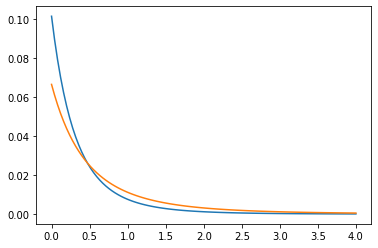

In [5]:
import pandas as pd
no_of_matches_for_time = 4  # Don't mess up with the matches for lbd values
t = np.linspace(0, no_of_matches_for_time, 102)
def expd(t, lbd):
    """Return the exponential distribution."""
    return lbd * np.exp(-lbd * t)

# let's make a 101x102 matrix of exponential distributions. The fact that the matrix is
# not square will help us to spot if the product is not carried in the proper way.
exp_df = pd.DataFrame([expd(t, lbd) for lbd in lbd_values])

# Now get the waiting times for both teams and normalize
X_f, X_c = [(exp_df.T * theta).sum(axis=1) for theta in (lf, lc)]
X_f /= X_f.sum()
X_c /= X_c.sum()

# Let's see how they look
[sns.lineplot(x=t, y=X) for X in (X_f, X_c)]

# Now we need the cartesian product of all variations of scoring at time t for both teams
xv, yv = np.meshgrid(X_f, X_c)
joint_probability = xv * yv
tf, tc = np.meshgrid(t, t)
france_scores_first, croatia_scores_first = tf < tc, tf > tc
joint_probability[france_scores_first].sum(), joint_probability[croatia_scores_first].sum()
